In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)


In [2]:
data_path = os.path.join(rpath,'data','data.csv')
data = pd.read_csv(data_path)
data['TransactionStartTime']=pd.to_datetime(data['TransactionStartTime'], format='mixed')
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


**Create Aggregate Features**

In [3]:
# Grouping by AccountId or CustomerId to calculate the total transaction amount
data['TotalTransactionAmount'] = data.groupby('CustomerId')['Amount'].transform('sum')
# Calculating the average transaction amount per customer
data['AverageTransactionAmount'] = data.groupby('CustomerId')['Amount'].transform('mean')
# Counting the number of transactions per customer
data['TransactionCount'] = data.groupby('CustomerId')['TransactionId'].transform('count')
# Calculating the standard deviation of transaction amounts per customer
data['TransactionAmountStdDev'] = data.groupby('CustomerId')['Amount'].transform('std')


In [5]:
customer_aggregates = data.groupby('CustomerId').agg(
    TotalTransactionAmount=('Amount', 'sum'),
    AverageTransactionAmount=('Amount', 'mean'),
    TransactionCount=('TransactionId', 'count'),
    TransactionAmountStdDev=('Amount', 'std'),
    MinTransactionAmount=('Amount', 'min'),
    MaxTransactionAmount=('Amount', 'max'),
    FirstTransactionDate=('TransactionStartTime', 'min'),
    LastTransactionDate=('TransactionStartTime', 'max')
).reset_index()
customer_aggregates

,CustomerId,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,TransactionAmountStdDev,MinTransactionAmount,MaxTransactionAmount,FirstTransactionDate,LastTransactionDate
0,CustomerId_1,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00
1,CustomerId_10,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333,-5000.0,10000.0,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00
3,CustomerId_1002,4225.0,384.090909,11,560.498966,-75.0,1500.0,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146,-5000.0,10000.0,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00
...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,20000.0,3333.333333,6,6088.240030,-5000.0,10000.0,2019-02-08 10:23:23+00:00,2019-02-08 10:27:42+00:00
3738,CustomerId_993,20000.0,4000.000000,5,6745.368782,-5000.0,10000.0,2019-01-18 15:51:50+00:00,2019-01-18 15:56:30+00:00
3739,CustomerId_994,543873.0,5384.881188,101,14800.656784,-5000.0,90000.0,2018-11-15 18:37:07+00:00,2019-02-12 11:17:08+00:00
3740,CustomerId_996,139000.0,8176.470588,17,4433.329648,-5000.0,10000.0,2018-12-07 14:37:54+00:00,2018-12-07 15:24:31+00:00


In [27]:
customer_aggregates

,CustomerId,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,TransactionAmountStdDev,MinTransactionAmount,MaxTransactionAmount,FirstTransactionDate,LastTransactionDate
0,CustomerId_1,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00
1,CustomerId_10,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333,-5000.0,10000.0,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00
3,CustomerId_1002,4225.0,384.090909,11,560.498966,-75.0,1500.0,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146,-5000.0,10000.0,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00
...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,20000.0,3333.333333,6,6088.240030,-5000.0,10000.0,2019-02-08 10:23:23+00:00,2019-02-08 10:27:42+00:00
3738,CustomerId_993,20000.0,4000.000000,5,6745.368782,-5000.0,10000.0,2019-01-18 15:51:50+00:00,2019-01-18 15:56:30+00:00
3739,CustomerId_994,543873.0,5384.881188,101,14800.656784,-5000.0,90000.0,2018-11-15 18:37:07+00:00,2019-02-12 11:17:08+00:00
3740,CustomerId_996,139000.0,8176.470588,17,4433.329648,-5000.0,10000.0,2018-12-07 14:37:54+00:00,2018-12-07 15:24:31+00:00


**Extract Features**

In [6]:
data['Date']=data['TransactionStartTime'].dt.date
data['Date']=pd.to_datetime(data['Date'])
data['dy']=data['TransactionStartTime'].dt.day
data['month']=data['TransactionStartTime'].dt.month
data['year']=data['TransactionStartTime'].dt.year
data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,TransactionAmountStdDev,Date,dy,month,year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,109921.75,923.712185,119,3042.294251,2018-11-15,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,109921.75,923.712185,119,3042.294251,2018-11-15,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0,1000.00,500.000000,2,0.000000,2018-11-15,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,0,228727.20,6019.136842,38,17169.241610,2018-11-15,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,228727.20,6019.136842,38,17169.241610,2018-11-15,15,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,2438140.00,4255.043630,573,22554.029939,2019-02-13,13,2,2019
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,58499.60,1360.455814,43,2274.756582,2019-02-13,13,2,2019
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,58499.60,1360.455814,43,2274.756582,2019-02-13,13,2,2019
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,...,2,0,851985.00,1625.925573,524,3207.920536,2019-02-13,13,2,2019


**Encoding Catagorical Columns**

In [26]:
from sklearn.preprocessing import LabelEncoder

# Example categorical column to label encode
label_encoder = LabelEncoder()

# Label encoding for the 'ProductCategory' column
data['ProductCategory_Encoded'] = label_encoder.fit_transform(data['ProductCategory'])
data['CurrencyCode_Encoded'] = label_encoder.fit_transform(data['CurrencyCode'])
data['ChannelId_Encoded'] = label_encoder.fit_transform(data['ChannelId'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

# Display the DataFrame with label-encoded column
data


{'ChannelId_1': 0, 'ChannelId_2': 1, 'ChannelId_3': 2, 'ChannelId_5': 3}


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TransactionAmountStdDev,Date,dy,month,year,ProductCategory_Encoded,CurrencyCode_Encoded,ChannelId_Encoded,Amount_Normalized,Value_Normalized
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,3042.294251,2018-11-15,15,11,2018,0,0,2,0.092004,0.000101
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,3042.294251,2018-11-15,15,11,2018,2,0,1,0.091910,0.000002
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,0.000000,2018-11-15,15,11,2018,0,0,2,0.091958,0.000050
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,17169.241610,2018-11-15,15,11,2018,8,0,2,0.093750,0.002206
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,17169.241610,2018-11-15,15,11,2018,2,0,1,0.091853,0.000065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,...,22554.029939,2019-02-13,13,2,2019,2,0,1,0.091820,0.000101
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,...,2274.756582,2019-02-13,13,2,2019,0,0,2,0.092004,0.000101
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2274.756582,2019-02-13,13,2,2019,2,0,1,0.091910,0.000002
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,...,3207.920536,2019-02-13,13,2,2019,7,0,2,0.092188,0.000303


* **Normalization** is an important preprocessing techniques used to bring numerical features onto a similar scale, improving model performance and convergence in machine learning algorithms. Here's a brief on both techniques along with examples on how to apply them.

* Normalization scales the values to a range of [0, 1]. It's useful when you want to keep the data in a specific range, especially for models like K-Nearest Neighbors or Neural Networks that rely on distance calculations.

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Example: Normalize the 'Amount' and 'Value' columns
scaler = MinMaxScaler()

# Fit and transform the data to [0, 1] range
data[['Amount_Normalized', 'Value_Normalized']] = scaler.fit_transform(data[['Amount', 'Value']])

# Display the normalized columns
data[['Amount_Normalized', 'Value_Normalized']].head()


,Amount_Normalized,Value_Normalized
0,0.092004,0.000101
1,0.091910,0.000002
2,0.091958,0.000050
3,0.093750,0.002206
4,0.091853,0.000065


In [24]:
data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TransactionAmountStdDev,Date,dy,month,year,ProductCategory_Encoded,CurrencyCode_Encoded,ChannelId_Encoded,Amount_Normalized,Value_Normalized
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,3042.294251,2018-11-15,15,11,2018,0,0,2,0.092004,0.000101
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,3042.294251,2018-11-15,15,11,2018,2,0,1,0.091910,0.000002
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,0.000000,2018-11-15,15,11,2018,0,0,2,0.091958,0.000050
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,17169.241610,2018-11-15,15,11,2018,8,0,2,0.093750,0.002206
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,17169.241610,2018-11-15,15,11,2018,2,0,1,0.091853,0.000065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,...,22554.029939,2019-02-13,13,2,2019,2,0,1,0.091820,0.000101
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,...,2274.756582,2019-02-13,13,2,2019,0,0,2,0.092004,0.000101
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2274.756582,2019-02-13,13,2,2019,2,0,1,0.091910,0.000002
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,...,3207.920536,2019-02-13,13,2,2019,7,0,2,0.092188,0.000303


In [10]:
data_path = os.path.join(rpath,'data','processed_data.csv')
data.to_csv(data_path,index=False)

**Task 3 - Default estimator and WoE binning**

* To create a default estimator and apply Weight of Evidence (WoE) binning in the context of classifying users as high-risk or low-risk based on RFMS (Recency, Frequency, Monetary, and Stability) features, we need to follow a systematic approach. 

RFMS features consist of:

- Recency (R): How recently the user made a transaction.
- Frequency (F): How often the user makes transactions.
- Monetary (M): Total amount spent by the user.
- Stability (S): How consistent the user is over time (could be variance in transaction amounts, frequency, etc.).

In [11]:
# Calculate Recency (days since last transaction)
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
last_transaction = data.groupby('CustomerId')['TransactionStartTime'].max()
recency = (data['TransactionStartTime'].max() - last_transaction).dt.days

# Calculate Frequency (number of transactions)
frequency = data.groupby('CustomerId')['TransactionId'].count()

# Calculate Monetary (total amount spent)
monetary = data.groupby('CustomerId')['Amount'].sum()

# Calculate Stability (could be standard deviation of transaction amounts)
stability = data.groupby('CustomerId')['Amount'].std().fillna(0)

# Combine these into a new DataFrame
rfms = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary, 'Stability': stability})

# Preview the RFMS features
rfms.head()


,Recency,Frequency,Monetary,Stability
CustomerId,,,,
CustomerId_1,83,1,-10000.0,0.000000
CustomerId_10,83,1,-10000.0,0.000000
CustomerId_1001,89,5,20000.0,6558.963333
CustomerId_1002,25,11,4225.0,560.498966
CustomerId_1003,11,6,20000.0,6030.478146


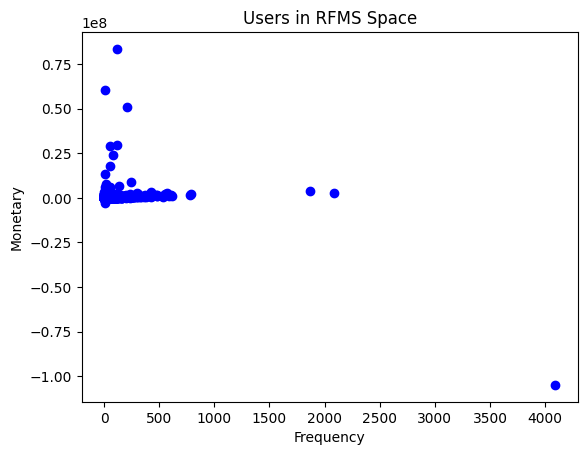

In [12]:
import matplotlib.pyplot as plt

plt.scatter(rfms['Frequency'], rfms['Monetary'], c='blue', label='Users')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Users in RFMS Space')
plt.show()


In [13]:
# thresholds for classification
rfms['Label'] = 'Good'
rfms.loc[(rfms['Recency'] > 30) | (rfms['Frequency'] < 5) | (rfms['Monetary'] < 100), 'Label'] = 'Bad'

# Preview the labeled data
rfms.head()


,Recency,Frequency,Monetary,Stability,Label
CustomerId,,,,,
CustomerId_1,83,1,-10000.0,0.000000,Bad
CustomerId_10,83,1,-10000.0,0.000000,Bad
CustomerId_1001,89,5,20000.0,6558.963333,Bad
CustomerId_1002,25,11,4225.0,560.498966,Good
CustomerId_1003,11,6,20000.0,6030.478146,Good


In [21]:
print(rfms['Label'].value_counts())

Label
1    2135
0    1607
Name: count, dtype: int64


In [29]:
rfms.columns

Index(['Recency', 'Frequency', 'Monetary', 'Stability', 'Label', 'bin'], dtype='object')

In [32]:
customer_aggregates = customer_aggregates.set_index('CustomerId')
customer_aggregates

,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,TransactionAmountStdDev,MinTransactionAmount,MaxTransactionAmount,FirstTransactionDate,LastTransactionDate
CustomerId,,,,,,,,
CustomerId_1,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00
CustomerId_10,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00
CustomerId_1001,20000.0,4000.000000,5,6558.963333,-5000.0,10000.0,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00
CustomerId_1002,4225.0,384.090909,11,560.498966,-75.0,1500.0,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00
CustomerId_1003,20000.0,3333.333333,6,6030.478146,-5000.0,10000.0,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00
...,...,...,...,...,...,...,...,...
CustomerId_992,20000.0,3333.333333,6,6088.240030,-5000.0,10000.0,2019-02-08 10:23:23+00:00,2019-02-08 10:27:42+00:00
CustomerId_993,20000.0,4000.000000,5,6745.368782,-5000.0,10000.0,2019-01-18 15:51:50+00:00,2019-01-18 15:56:30+00:00
CustomerId_994,543873.0,5384.881188,101,14800.656784,-5000.0,90000.0,2018-11-15 18:37:07+00:00,2019-02-12 11:17:08+00:00


In [37]:
# Select columns from rfms
col = rfms[['Recency', 'Frequency', 'Monetary', 'Stability', 'Label', 'bin']]

# Ensure both DataFrames are aligned by their index and then merge
data_aggregated = customer_aggregates.join(col)
data_aggregated

,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,TransactionAmountStdDev,MinTransactionAmount,MaxTransactionAmount,FirstTransactionDate,LastTransactionDate,Recency,Frequency,Monetary,Stability,Label,bin
CustomerId,,,,,,,,,,,,,,
CustomerId_1,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00,83,1,-10000.0,0.000000,1,"(81.0, 90.0]"
CustomerId_10,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00,83,1,-10000.0,0.000000,1,"(81.0, 90.0]"
CustomerId_1001,20000.0,4000.000000,5,6558.963333,-5000.0,10000.0,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00,89,5,20000.0,6558.963333,1,"(81.0, 90.0]"
CustomerId_1002,4225.0,384.090909,11,560.498966,-75.0,1500.0,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00,25,11,4225.0,560.498966,0,"(18.0, 27.0]"
CustomerId_1003,20000.0,3333.333333,6,6030.478146,-5000.0,10000.0,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00,11,6,20000.0,6030.478146,0,"(9.0, 18.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CustomerId_992,20000.0,3333.333333,6,6088.240030,-5000.0,10000.0,2019-02-08 10:23:23+00:00,2019-02-08 10:27:42+00:00,4,6,20000.0,6088.240030,0,"(-0.09, 9.0]"
CustomerId_993,20000.0,4000.000000,5,6745.368782,-5000.0,10000.0,2019-01-18 15:51:50+00:00,2019-01-18 15:56:30+00:00,25,5,20000.0,6745.368782,0,"(18.0, 27.0]"
CustomerId_994,543873.0,5384.881188,101,14800.656784,-5000.0,90000.0,2018-11-15 18:37:07+00:00,2019-02-12 11:17:08+00:00,0,101,543873.0,14800.656784,0,"(-0.09, 9.0]"


In [40]:
data_aggregated['FirstTransactionDate']=pd.to_datetime(data_aggregated['FirstTransactionDate'])
data_aggregated['FirstDay']=data_aggregated['FirstTransactionDate'].dt.day
data_aggregated['FirstMonth']=data_aggregated['FirstTransactionDate'].dt.month
data_aggregated['FirstYear']=data_aggregated['FirstTransactionDate'].dt.year
data_aggregated

,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,TransactionAmountStdDev,MinTransactionAmount,MaxTransactionAmount,FirstTransactionDate,LastTransactionDate,Recency,Frequency,Monetary,Stability,Label,bin,FirstDay,FirstMonth,FirstYear
CustomerId,,,,,,,,,,,,,,,,,
CustomerId_1,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00,83,1,-10000.0,0.000000,1,"(81.0, 90.0]",21,11,2018
CustomerId_10,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00,83,1,-10000.0,0.000000,1,"(81.0, 90.0]",21,11,2018
CustomerId_1001,20000.0,4000.000000,5,6558.963333,-5000.0,10000.0,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00,89,5,20000.0,6558.963333,1,"(81.0, 90.0]",16,11,2018
CustomerId_1002,4225.0,384.090909,11,560.498966,-75.0,1500.0,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00,25,11,4225.0,560.498966,0,"(18.0, 27.0]",15,11,2018
CustomerId_1003,20000.0,3333.333333,6,6030.478146,-5000.0,10000.0,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00,11,6,20000.0,6030.478146,0,"(9.0, 18.0]",1,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CustomerId_992,20000.0,3333.333333,6,6088.240030,-5000.0,10000.0,2019-02-08 10:23:23+00:00,2019-02-08 10:27:42+00:00,4,6,20000.0,6088.240030,0,"(-0.09, 9.0]",8,2,2019
CustomerId_993,20000.0,4000.000000,5,6745.368782,-5000.0,10000.0,2019-01-18 15:51:50+00:00,2019-01-18 15:56:30+00:00,25,5,20000.0,6745.368782,0,"(18.0, 27.0]",18,1,2019
CustomerId_994,543873.0,5384.881188,101,14800.656784,-5000.0,90000.0,2018-11-15 18:37:07+00:00,2019-02-12 11:17:08+00:00,0,101,543873.0,14800.656784,0,"(-0.09, 9.0]",15,11,2018


In [41]:
data_aggregated['LastTransactionDate']=pd.to_datetime(data_aggregated['LastTransactionDate'])
data_aggregated['LastDay']=data_aggregated['LastTransactionDate'].dt.day
data_aggregated['LastMonth']=data_aggregated['LastTransactionDate'].dt.month
data_aggregated['LastYear']=data_aggregated['LastTransactionDate'].dt.year
data_aggregated

,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,TransactionAmountStdDev,MinTransactionAmount,MaxTransactionAmount,FirstTransactionDate,LastTransactionDate,Recency,Frequency,Monetary,Stability,Label,bin,FirstDay,FirstMonth,FirstYear,LastDay,LastMonth,LastYear
CustomerId,,,,,,,,,,,,,,,,,,,,
CustomerId_1,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00,83,1,-10000.0,0.000000,1,"(81.0, 90.0]",21,11,2018,21,11,2018
CustomerId_10,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00,83,1,-10000.0,0.000000,1,"(81.0, 90.0]",21,11,2018,21,11,2018
CustomerId_1001,20000.0,4000.000000,5,6558.963333,-5000.0,10000.0,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00,89,5,20000.0,6558.963333,1,"(81.0, 90.0]",16,11,2018,16,11,2018
CustomerId_1002,4225.0,384.090909,11,560.498966,-75.0,1500.0,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00,25,11,4225.0,560.498966,0,"(18.0, 27.0]",15,11,2018,18,1,2019
CustomerId_1003,20000.0,3333.333333,6,6030.478146,-5000.0,10000.0,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00,11,6,20000.0,6030.478146,0,"(9.0, 18.0]",1,2,2019,1,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CustomerId_992,20000.0,3333.333333,6,6088.240030,-5000.0,10000.0,2019-02-08 10:23:23+00:00,2019-02-08 10:27:42+00:00,4,6,20000.0,6088.240030,0,"(-0.09, 9.0]",8,2,2019,8,2,2019
CustomerId_993,20000.0,4000.000000,5,6745.368782,-5000.0,10000.0,2019-01-18 15:51:50+00:00,2019-01-18 15:56:30+00:00,25,5,20000.0,6745.368782,0,"(18.0, 27.0]",18,1,2019,18,1,2019
CustomerId_994,543873.0,5384.881188,101,14800.656784,-5000.0,90000.0,2018-11-15 18:37:07+00:00,2019-02-12 11:17:08+00:00,0,101,543873.0,14800.656784,0,"(-0.09, 9.0]",15,11,2018,12,2,2019


In [42]:
data_aggregated.columns

Index(['TotalTransactionAmount', 'AverageTransactionAmount',
       'TransactionCount', 'TransactionAmountStdDev', 'MinTransactionAmount',
       'MaxTransactionAmount', 'FirstTransactionDate', 'LastTransactionDate',
       'Recency', 'Frequency', 'Monetary', 'Stability', 'Label', 'bin',
       'FirstDay', 'FirstMonth', 'FirstYear', 'LastDay', 'LastMonth',
       'LastYear'],
      dtype='object')

In [43]:
data_aggregated = data_aggregated[['FirstTransactionDate', 'LastTransactionDate','FirstDay', 'FirstMonth', 'FirstYear', 'LastDay', 'LastMonth',
       'LastYear','TotalTransactionAmount', 'AverageTransactionAmount','TransactionCount', 'TransactionAmountStdDev', 'MinTransactionAmount',
       'MaxTransactionAmount','Recency', 'Frequency', 'Monetary', 'Stability', 'bin', 'Label']]
data_aggregated

,FirstTransactionDate,LastTransactionDate,FirstDay,FirstMonth,FirstYear,LastDay,LastMonth,LastYear,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,TransactionAmountStdDev,MinTransactionAmount,MaxTransactionAmount,Recency,Frequency,Monetary,Stability,bin,Label
CustomerId,,,,,,,,,,,,,,,,,,,,
CustomerId_1,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00,21,11,2018,21,11,2018,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,83,1,-10000.0,0.000000,"(81.0, 90.0]",1
CustomerId_10,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00,21,11,2018,21,11,2018,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,83,1,-10000.0,0.000000,"(81.0, 90.0]",1
CustomerId_1001,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00,16,11,2018,16,11,2018,20000.0,4000.000000,5,6558.963333,-5000.0,10000.0,89,5,20000.0,6558.963333,"(81.0, 90.0]",1
CustomerId_1002,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00,15,11,2018,18,1,2019,4225.0,384.090909,11,560.498966,-75.0,1500.0,25,11,4225.0,560.498966,"(18.0, 27.0]",0
CustomerId_1003,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00,1,2,2019,1,2,2019,20000.0,3333.333333,6,6030.478146,-5000.0,10000.0,11,6,20000.0,6030.478146,"(9.0, 18.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CustomerId_992,2019-02-08 10:23:23+00:00,2019-02-08 10:27:42+00:00,8,2,2019,8,2,2019,20000.0,3333.333333,6,6088.240030,-5000.0,10000.0,4,6,20000.0,6088.240030,"(-0.09, 9.0]",0
CustomerId_993,2019-01-18 15:51:50+00:00,2019-01-18 15:56:30+00:00,18,1,2019,18,1,2019,20000.0,4000.000000,5,6745.368782,-5000.0,10000.0,25,5,20000.0,6745.368782,"(18.0, 27.0]",0
CustomerId_994,2018-11-15 18:37:07+00:00,2019-02-12 11:17:08+00:00,15,11,2018,12,2,2019,543873.0,5384.881188,101,14800.656784,-5000.0,90000.0,0,101,543873.0,14800.656784,"(-0.09, 9.0]",0


In [44]:
datapath = os.path.join(rpath,'data','data_aggregated.csv')
data_aggregated.to_csv(datapath)

**Perform Weight of Evidence (WoE) Binning**
* Weight of Evidence (WoE) binning helps convert continuous variables into categorical bins while maintaining the relationship between the target and the feature. Here’s how to apply WoE binning:

In [48]:
# Convert 'Label' column to binary values
rfms['Label'] = rfms['Label'].map({'Good': 0, 'Bad': 1})


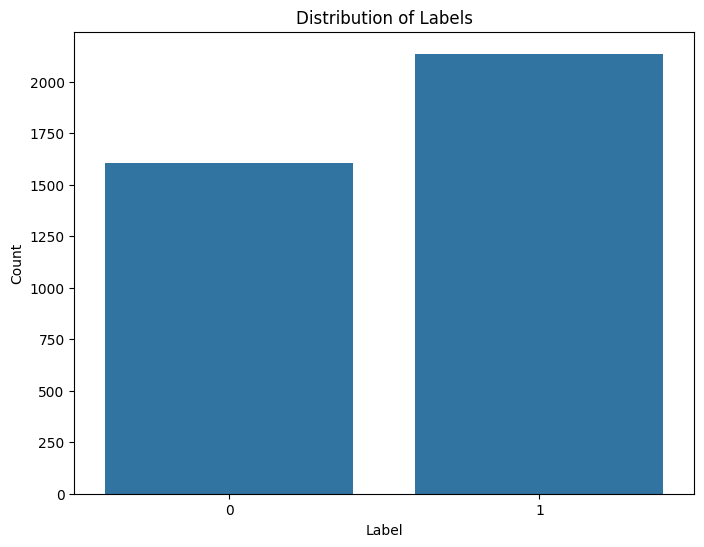

In [50]:
# prompt: plot the label distribution of data_aggregated
# Count the occurrences of each label
label_counts = data_aggregated['Label'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=data_aggregated)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [51]:
label_counts

Label
1    2135
0    1607
Name: count, dtype: int64

In [22]:
import numpy as np
import pandas as pd

def woe_binning(data, target, feature, bins=10):
    # Bin the continuous variable
    data['bin'] = pd.cut(data[feature], bins=bins)

    # Calculate the WoE for each bin
    binned = data.groupby('bin')[target].agg(['count', 'sum'])
    binned['good'] = binned['count'] - binned['sum']

    # Avoid division by zero by replacing zeros in 'good' or 'sum' with a small value (epsilon)
    epsilon = 0.0001
    binned['sum'] = binned['sum'].replace(0, epsilon)
    binned['good'] = binned['good'].replace(0, epsilon)

    # Calculate WoE
    binned['woe'] = np.log((binned['sum'] / binned['sum'].sum()) / (binned['good'] / binned['good'].sum()))

    return binned

# Example of applying WoE binning to Recency
woe_result = woe_binning(rfms, target='Label', feature='Recency')
print(woe_result)


              count  sum       good        woe
bin                                           
(-0.09, 9.0]   1214  195  1019.0000  -1.937675
(9.0, 18.0]     468  111   357.0000  -1.452303
(18.0, 27.0]    314  122   192.0000  -0.737572
(27.0, 36.0]    337  298    39.0000   1.749435
(36.0, 45.0]    232  232     0.0001  14.372981
(45.0, 54.0]    345  345     0.0001  14.769788
(54.0, 63.0]    255  255     0.0001  14.467507
(63.0, 72.0]    188  188     0.0001  14.162685
(72.0, 81.0]    170  170     0.0001  14.062042
(81.0, 90.0]    219  219     0.0001  14.315315


C:\Users\AII\AppData\Local\Temp\ipykernel_10724\3752831410.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = data.groupby('bin')[target].agg(['count', 'sum'])
